In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier

In [92]:
# load data
test_features = pd.read_csv("test_features.csv")
train_features = pd.read_csv("train_features.csv")
train_labels = pd.read_csv("train_labels.csv")
valid_features = pd.read_csv("valid_features.csv")
valid_labels = pd.read_csv("valid_labels.csv")
test_features = pd.read_csv("test_features.csv")

In [94]:
# Split data
from pandas import DataFrame
# Metadata except title
metadata_train_features = train_features[['loudness' ,'tempo', 'time_signature', 'key', 'mode', 'duration']]
metadata_valid_features = valid_features[['loudness' ,'tempo', 'time_signature', 'key', 'mode', 'duration']]
metadata_test_features = test_features[['loudness' ,'tempo', 'time_signature', 'key', 'mode', 'duration']]

# Lyric data 
lyric_train_features = train_features['tags']
lyric_valid_features = valid_features['tags']
lyric_test_features  = test_features['tags']

# Audio data
audio_train_features= train_features.iloc[:,9:]
audio_valid_features = valid_features.iloc[:,9:]
audio_test_features = test_features.iloc[:,9:]

# train data class label
y_train_labels=train_labels['genre']
y_train_labels = DataFrame(y_train_labels)

# validation data class label
y_valid_labels=valid_labels['genre']
y_valid_labels = DataFrame(y_valid_labels)

In [95]:
# TF-IDF
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

train_tags = train_features.tags.to_numpy()
valid_tags = valid_features.tags.to_numpy()
test_tags = test_features.tags.to_numpy()

#vectorizer = CountVectorizer()

# TF-IDF: Vectorize tags data and put weight according to frequency 
tfidfv_train = TfidfVectorizer().fit(train_tags)
frame_train =DataFrame(tfidfv_train.transform(train_tags).toarray())

tfidfv_valid = TfidfVectorizer().fit(valid_tags)
frame_valid =DataFrame(tfidfv_train.transform(valid_tags).toarray())

tfidfv_test = TfidfVectorizer().fit(test_tags)
frame_test =DataFrame(tfidfv_train.transform(test_tags).toarray())

In [96]:
###################################################################################
# Naive Bayes
###################################################################################
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes
GNB = GaussianNB()

# Fit Gaussian Naive Bayes with metadata   
GNB.fit(metadata_train_features, np.ravel(y_train_labels))

# predict_valid_GNB = GNB.predict(metadata_valid_features)

# train Metadata accuracy  
pred_train= GNB.score(metadata_train_features , np.ravel(y_train_labels))
pred_train_str = str(pred_train)
print(' Metadata Training Accuracy of Gaussian Naive Bayes = ' + pred_train_str)

# valid Metadata accuracy
pred_valid= GNB.score(metadata_valid_features , np.ravel(y_valid_labels))
pred_valid_str = str(pred_valid)
print(' Metadata validation Accuracy of Gaussian Naive Bayes = ' + pred_valid_str)

 Metadata Training Accuracy of Gaussian Naive Bayes = 0.3586871581140922
 Metadata validation Accuracy of Gaussian Naive Bayes = 0.2688888888888889


In [97]:
# Evaluate Gaussian Naive Bayes model with validatation data: Precision, Recall, F score 
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_valid_labels, predict_valid_GNB, average='micro')

(0.4911111111111111, 0.4911111111111111, 0.4911111111111111, None)

In [102]:
# feature selection
from sklearn.feature_selection import RFE

# Feature extraction
model =  GaussianNB()
rfe = RFE(model, 6)
fit = rfe.fit(metadata_train_features, np.ravel(y_train_labels))
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 6
Selected Features: [ True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1]


C:\Users\s_bjg9089\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [99]:
# lyric data (tags)

# Train Gaussian Naive Bayes model with lyric data
GNB.fit(frame_train, np.ravel(y_train_labels))

predict_train_GNB = GNB.predict(frame_train)
predict_valid_GNB = GNB.predict(frame_valid)

# train lyric data accuracy  
pred_train = GNB.score(frame_train, y_train_labels )
pred_train_str = str(pred_train)
print(' Lyric data training Accuracy of Gaussian Naive Bayes = ' + pred_train_str)

# valid lyric data accuracy  
pred_valid = GNB.score(frame_valid, y_valid_labels )
pred_valid_str = str(pred_valid)
print(' Lyric data valid Accuracy of Gaussian Naive Bayes = ' + pred_valid_str)

 Lyric data training Accuracy of Gaussian Naive Bayes = 0.4963532169835895
 Lyric data valid Accuracy of Gaussian Naive Bayes = 0.41333333333333333


In [100]:
# Evaluate Gaussian Naive Bayes model with validatation data: Precision, Recall, F score 
precision_recall_fscore_support(y_valid_labels, predict_valid_GNB, average='micro')

(0.41333333333333333, 0.41333333333333333, 0.41333333333333333, None)

In [104]:
# Audio data

# Fit Gaussian Naive Bayes with audion data   
GNB.fit(audio_train_features, np.ravel(y_train_labels))

predict_train_GNB = GNB.predict(audio_train_features)
predict_valid_GNB = GNB.predict(audio_valid_features)

# train audio data accuracy
pred_train = GNB.score(audio_train_features,y_train_labels ) # Audio train data
pred_train_str = str(pred_train )
print(' Audio data Training Accuracy of Gaussian Naive Bayes = ' + pred_train_str)

# validation audio data accuracy
pred_valid = GNB.score(audio_valid_features,y_valid_labels ) # Audio valid data
pred_valid_str = str(pred_valid)
print(' Audio data validation Accuracy of Gaussian Naive Bayes = ' + pred_valid_str)


 Audio data Training Accuracy of Gaussian Naive Bayes = 0.41885907788486587
 Audio data validation Accuracy of Gaussian Naive Bayes = 0.4911111111111111


In [105]:
# Evalutaion Gaussian Naive Bayes model with validation audio data: Precision, Recall, F score 
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_valid_labels,predict_valid_GNB, average='micro')

(0.4911111111111111, 0.4911111111111111, 0.4911111111111111, None)

In [106]:
###########################################################
# Decision Tree
###########################################################

In [107]:
from sklearn import tree
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier

In [108]:
# Metadata Decision tree
DT = DecisionTreeClassifier(criterion='entropy',max_depth=3) # decision tree optimal depth?????

# Fit Decision Tree with metadata   
DT.fit(metadata_train_features, np.ravel(y_train_labels))

# predict 
predict_train_DT = DT.predict(metadata_train_features)
predict_valid_DT = DT.predict(metadata_valid_features)

# train metadata accuracy
pred_train = DT.score(metadata_train_features, np.ravel(y_train_labels)) 
pred_train_str = str(pred_train )
print(' Metadata Training Accuracy of Decision Tree = ' + pred_train_str)

# validation metadataa accuracy
pred_valid = DT.score(metadata_valid_features,np.ravel(y_valid_labels) ) 
pred_valid_str = str(pred_valid)
print(' Metadata validation Accuracy of Decision Tree = ' + pred_valid_str)

 Metadata Training Accuracy of Decision Tree = 0.37574889294087
 Metadata validation Accuracy of Decision Tree = 0.26666666666666666


In [109]:
# Evaluate Decision Tree model with validatation data: Precision, Recall, F score 
precision_recall_fscore_support(y_valid_labels, predict_valid_DT, average='micro')

(0.26666666666666666, 0.26666666666666666, 0.26666666666666666, None)

Text(0.5, 1.0, '[ Decision Tree (metadata) ]')

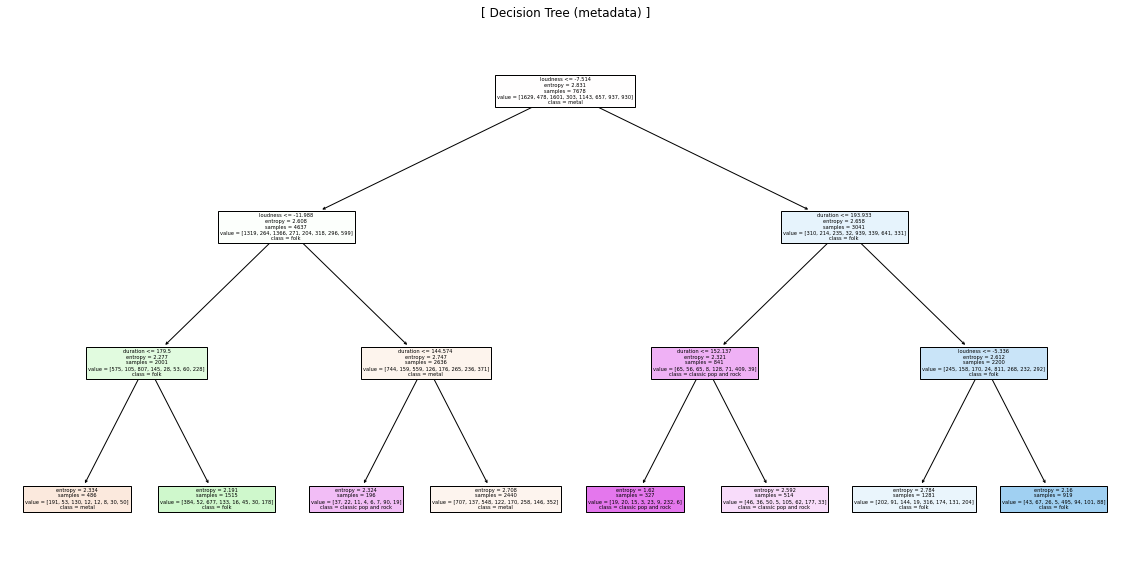

In [110]:
# Visualize Decision Tree 
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(DT, 
                   feature_names=metadata_train_features.columns,  
                   class_names=np.ravel(y_train_labels),
                   filled=True)


plt.title('[ Decision Tree (metadata) ]')

In [111]:
# Lyric data (tags) Decision Tree

# Fit Decision Tree with lyric data    
DT.fit(frame_train, np.ravel(y_train_labels))

# predict 
predict_train_DT = DT.predict(frame_train)
predict_valid_DT = DT.predict(frame_valid)

# train metadata accuracy
pred_train = DT.score(frame_train , np.ravel(y_train_labels)) 
pred_train_str = str(pred_train )
print(' Metadata Training Accuracy of Decision Tree = ' + pred_train_str)

# validation metadataa accuracy
pred_valid = DT.score(frame_valid , np.ravel(y_valid_labels)) 
pred_valid_str = str(pred_valid)
print(' Metadata validation Accuracy of Decision Tree = ' + pred_valid_str)

 Metadata Training Accuracy of Decision Tree = 0.31193019015368584
 Metadata validation Accuracy of Decision Tree = 0.3622222222222222


In [112]:
# Evaluate Decision Tree model with validatation data: Precision, Recall, F score 
precision_recall_fscore_support(y_valid_labels, predict_valid_DT, average='micro')

(0.3622222222222222, 0.3622222222222222, 0.36222222222222217, None)

In [113]:
# Audio data Decision Tree
DT = DecisionTreeClassifier(criterion='entropy',max_depth=10)

# Fit Decision Tree with audio data     
DT.fit(audio_train_features, np.ravel(y_train_labels))

# predict 
predict_train_DT = DT.predict(audio_train_features)
predict_valid_DT = DT.predict(audio_valid_features)

# train audio data accuracy
pred_train = DT.score(audio_train_features , np.ravel(y_train_labels)) 
pred_train_str = str(pred_train )
print(' Audio data Training Accuracy of Decision Tree = ' + pred_train_str)

# validation audion data accuracy
pred_valid = DT.score(audio_valid_features , np.ravel(y_valid_labels)) 
pred_valid_str = str(pred_valid)
print(' Audio data validation Accuracy of Decision Tree = ' + pred_valid_str)

 Audio data Training Accuracy of Decision Tree = 0.7234957020057307
 Audio data validation Accuracy of Decision Tree = 0.3688888888888889


In [114]:
# Evaluate Decision Tree model with validatation data: Precision, Recall, F score 
print(precision_recall_fscore_support(y_valid_labels, predict_valid_DT, average='micro'))

(0.3688888888888889, 0.3688888888888889, 0.3688888888888889, None)


In [115]:
####################################################################
# Logistic Regression
####################################################################

In [116]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
# Convert logistic regression model for multiclass 
clf = OneVsRestClassifier(lr)

In [117]:
# Metadata Logistic Regression

# Fit Multiclass Logistic Regression with metadata     
clf.fit(metadata_train_features, np.ravel(y_train_labels))

# predict 
predict_train_LR = clf.predict(metadata_train_features)
predict_valid_LR = clf.predict(metadata_valid_features)

# train metadata accuracy
pred_train = clf.score(metadata_train_features, np.ravel(y_train_labels))
pred_str = str(pred_train)
print('Metadata train Accuracy of Logistic Regression = ' + pred_str)

# valid metadata accuracy 
pred_valid = clf.score(metadata_valid_features, np.ravel(y_valid_labels))
pred_str = str(pred_valid)
print('Metadata valid Accuracy of Logistic Regression = ' + pred_str)

C:\Users\s_bjg9089\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\s_bjg9089\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Metadata train Accuracy of Logistic Regression = 0.37275332117738996
Metadata valid Accuracy of Logistic Regression = 0.2911111111111111


In [118]:
# Evaluate Multiclass Logistic Regression model with validatation data: Precision, Recall, F score 
precision_recall_fscore_support(y_valid_labels, predict_valid_LR, average='micro')

(0.2911111111111111, 0.2911111111111111, 0.2911111111111111, None)

In [119]:
# Lyric data Multiclass Logistic Regression

# Fit Multiclass Logistic Regression with lyric data    
clf.fit(frame_train, np.ravel(y_train_labels))

# predict 
predict_train_LR = clf.predict(frame_train)
predict_valid_LR = clf.predict(frame_valid)

# train lyric data accuracy
pred_train = clf.score(frame_train, np.ravel(y_train_labels))
pred_str = str(pred_train)
print('Lyric data train Accuracy of Multiclass Logistic Regression = ' + pred_str)

# valid lyric data accuracy 
pred_valid = clf.score(frame_valid, np.ravel(y_valid_labels))
pred_str = str(pred_valid)
print('Lyric data valid Accuracy of Multiclass Logistic Regression = ' + pred_str)


# predict 
predict_train_LR = clf.predict(frame_train)
predict_valid_LR = clf.predict(frame_valid)
predict_test_LR = clf.predict(frame_test)


Lyric data train Accuracy of Multiclass Logistic Regression = 0.6897629591039334
Lyric data valid Accuracy of Multiclass Logistic Regression = 0.6022222222222222


In [120]:
# Evaluate Multiclass Logistic Regression model with validatation data: Precision, Recall, F score 
y_valid_predict=clf.predict(frame_valid)
precision_recall_fscore_support(y_valid_predict, np.ravel(y_valid_labels), average='micro')

(0.6022222222222222, 0.6022222222222222, 0.6022222222222222, None)

In [122]:
# Audio data Logistic Regression

# Fit Multiclass Logistic Regression with audio data    
clf.fit(audio_train_features, np.ravel(y_train_labels))

# predict 
predict_train_LR = clf.predict(audio_train_features)
predict_valid_LR = clf.predict(audio_valid_features)

# train lyric data accuracy
pred_train = clf.score(audio_train_features, np.ravel(y_train_labels))
pred_str = str(pred_train)
print('Audio data train Accuracy of Multiclass Logistic Regression = ' + pred_str)

# valid lyric data accuracy 
pred_valid = clf.score(audio_valid_features, np.ravel(y_valid_labels))
pred_str = str(pred_valid)
print('Audio data valid Accuracy of Multiclass Logistic Regression = ' + pred_str)

C:\Users\s_bjg9089\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\s_bjg9089\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Audio data train Accuracy of Multiclass Logistic Regression = 0.4893201354519406
Audio data valid Accuracy of Multiclass Logistic Regression = 0.4066666666666667


In [123]:
# Evaluate Multiclass Logistic Regression model with validatation data: Precision, Recall, F score 
precision_recall_fscore_support(y_valid_labels, predict_valid_LR, average='micro')

(0.4066666666666667, 0.4066666666666667, 0.4066666666666667, None)

In [124]:
# Learning curve - Logistic Regression by lyric data 
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(estimator = clf, X = frame_train,
                                                              y = np.ravel(y_train_labels),cv=5, scoring = 'accuracy')

In [125]:
train_mean = np.mean(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis= 1)

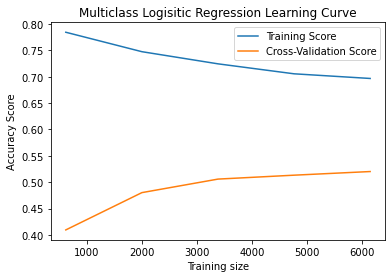

In [126]:
# plot Multiclass Logistic Regression Learning curve
plt.plot(train_sizes, train_mean, label= "Training Score")
plt.plot(train_sizes, validation_mean, label= "Cross-Validation Score")


plt.title('Multiclass Logisitic Regression Learning Curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

In [127]:
# Learning curve - Naive Bayes by lyric data 
train_sizes, train_scores, validation_scores = learning_curve(estimator = GNB, X = frame_train,
                                                              y = np.ravel(y_train_labels),cv=5, scoring = 'accuracy')

train_mean = np.mean(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis= 1)

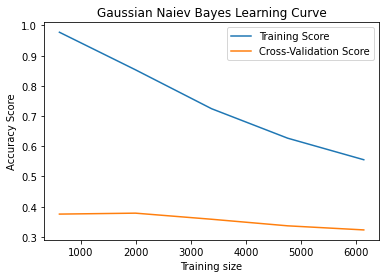

In [128]:
# plot Naive Bayes Learning curve
plt.plot(train_sizes, train_mean, label= "Training Score")
plt.plot(train_sizes, validation_mean, label= "Cross-Validation Score")


plt.title('Gaussian Naiev Bayes Learning Curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

In [129]:
# Learning curve - Decision Tree by lyric data 
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(estimator = DT, X = frame_train,
                                                              y = np.ravel(y_train_labels),cv=5, scoring = 'accuracy')

train_mean = np.mean(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis= 1)


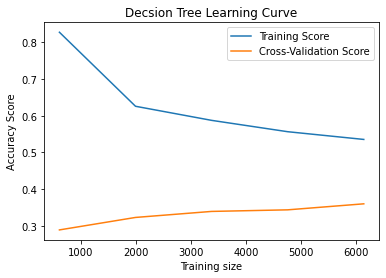

In [130]:
# plot Decision Tree Learning curve
plt.plot(train_sizes, train_mean, label= "Training Score")
plt.plot(train_sizes, validation_mean, label= "Cross-Validation Score")


plt.title('Decsion Tree Learning Curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

In [ ]:
# feature selection - Logistic Regression by lyric data 
# Impossible to implement beacuse leack of computing power
#rfe = RFE(model, 500)
fit = rfe.fit(frame_train, np.ravel(y_train_labels) )
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

                   Genre  Count
4   classic pop and rock   1629
1                   folk   1601
0                  metal   1143
5                   punk    937
3        soul and reggae    930
7                    pop    657
6  dance and electronica    478
2         jazz and blues    303


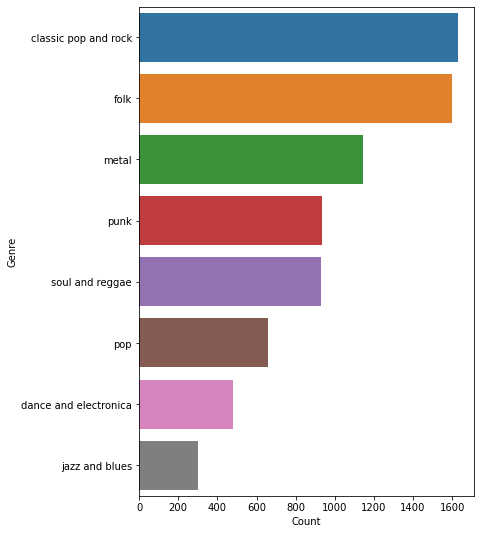

In [80]:
# Plot train data class distribtion
import nltk
# Check labels distribution
y=[]
for a in train_labels['genre']:
    y.append(a)
all_genres =y

all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})


g = all_genres_df.nlargest(columns="Count", n = 50) 
print(g)
plt.figure(figsize=(6,9)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(xlabel = 'Count') 
ax.set(ylabel = 'Genre')
plt.show()

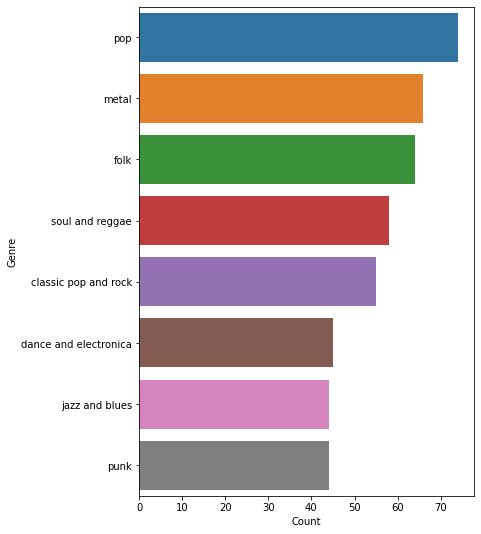

In [81]:
# Plot validation data class distribtion
y=[]
for a in valid_labels['genre']:
    y.append(a)
all_genres =y

all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})


g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(6,9)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(xlabel = 'Count') 
ax.set(ylabel = 'Genre')
plt.show()

In [82]:
##############################################
# Baseline - ZeroR
##############################################

In [85]:
#Set ZeroR as baseline - mf: most frequent
from sklearn.dummy import DummyClassifier
Dummy_classifier = DummyClassifier(strategy="most_frequent")
Dummy_classifier.fit(frame_train, np.ravel(y_train_labels))

Dummy_classifier.score(frame_train, np.ravel(y_train_labels))

0.21216462620474083

In [84]:
# Baseline validation accuracy 
Dummy_classifier.score(frame_valid, np.ravel(y_valid_labels))

0.12222222222222222

In [ ]:
##############################################
# Test the test data
##############################################

In [74]:
# Test data
predict_test_LR = clf.predict(frame_test)
predict_test_LR=DataFrame(predict_test_LR)
predict_test_LR.columns=["genre"]

test_trackID = test_features.iloc[:,0]
test_trackID= DataFrame(test_trackID)
test_trackID.columns=["trackID"]

test_result = pd.concat([test_trackID,predict_test_LR], axis=1, ignore_index=True) 
test_result.columns=["trackID", "genre"]

In [62]:
# Extract the predision as CSV file
#C:\Users\s_bjg9089\Desktop\Semester 2 - Unimelb
#test_result.to_csv(r'\test_Result3.csv', index = False)